In [ ]:
/projects/bgmp/shared/2017_sequencing/
1294_S1_L008_R1_001.fastq.gz  -- 1452986940 lines
1294_S1_L008_R2_001.fastq.gz  -- 1452986940 lines
1294_S1_L008_R3_001.fastq.gz  -- 1452986940 lines
1294_S1_L008_R4_001.fastq.gz  -- 1452986940 lines

In [ ]:
#for each file in bash
zcat 1294_S1_L008_R1_001.fastq.gz| head
#Compare sequence start bases to index bases, taking legnth into account
#Compare header numbers for read similarity across files

In [ ]:
index files:
1294_S1_L008_R2_001.fastq.gz
1294_S1_L008_R3_001.fastq.gz

read files:
1294_S1_L008_R1_001.fastq.gz
1294_S1_L008_R4_001.fastq.gz

In [2]:
print("File type"+'\t'+"File name")
print("Read1:"+'\t'+"1294_S1_L008_R1_001.fastq.gz")
print("Read2:"+'\t'+"1294_S1_L008_R4_001.fastq.gz")
print("Index1:"+'\t'+"1294_S1_L008_R2_001.fastq.gz")
print("Index2:"+'\t'+"1294_S1_L008_R3_001.fastq.gz")

File type	File name
Read1:	1294_S1_L008_R1_001.fastq.gz
Read2:	1294_S1_L008_R4_001.fastq.gz
Index1:	1294_S1_L008_R2_001.fastq.gz
Index2:	1294_S1_L008_R3_001.fastq.gz


In [22]:
#!/usr/bin/env python3
#SBATCH --partition=short       ### Partition (like a queue in PBS)
#SBATCH --job-name=RRPS7      	### Job Name
#SBATCH --time=0-20:01:00       ### Wall clock 0ime limit in Days-HH:MM:SS
#SBATCH --nodes=1               ### Number of nodes needed for the job
#SBATCH --ntasks-per-node=4     ### Number of tasks to be launched per Node
#SBATCH --mail-user=rarichardson92@gmail.com
#SBATCH --mail-type=BEGIN,END,FAIL

# Don't forget to load modules in bash, easybuild, prl, python/3.6.0 before running code!
#Install matplotlib for import and generation of plot!!

import argparse

def getarguments():
	parser=argparse.ArgumentParser(description = "Creates a distribution of mean quality scores across base positions in a zipped fastq file.")
	parser.add_argument("-f", "--file", help = "Defines name and path of file to use in program. Required, must be a string.", required = True, type = str)
	parser.add_argument("-n", "--numreads", help = "Defines number of reads in the file. Required, must be an integer.", required = True, type = int)
	parser.add_argument("-o", "--out", help = "Defines name and path of output plot file to use in program. Required, must be a string.", required = True, type = str)
	return parser.parse_args()

args=getarguments()
numreads=str(args.numreads)
file=str(args.file)
out=str(args.out)

#Initializes user defined variables, table for table of corresponding genes and protiens and data for data file of all protiens

#file = "./testfile.2.fastq.gz"
#defines input file

#out = "outthing"
#defines outfile name

#numreads = 10
#numreads = 363,246,735
#set for number of reads in fastq file

import numpy as np
import gzip

def convert_phred(letter):
    """Converts a single character into a phred score. Will not tolerate letters outside of Allchar, 
    which are the letters used for +33 quality scores."""
    Allchar="!\"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJK"
    if letter in Allchar:
        return Allchar.find(letter)
    else:
        raise ValueError("Invalid entry for +33 phred scores.")

def getlength(fastq):
    """Finds the length of the first sequence in a fastq file and returns length"""
    with gzip.open(fastq, "rt") as fh:
        LN=0
    #LN = line number
        for line in fh:
            line=line.strip('\n')
            LN += 1
            #LN = line number, adds 1 per line
            if LN == 2:
                return len(line)

            
seqlen = getlength(file)
#Returns length for first sequence, assumed all lines in file are at that length
all_qscores=np.zeros((seqlen), dtype=int)
#generates a np array thats as large as the expected file inputs for every quality score for each position in the sequence

with gzip.open(file, "rt") as fh:
    LN=0
    #LN = line number
    for line in fh:
        line=line.strip('\n')
        LN += 1
        #LN = line number, adds 1 per line
        if LN%4 == 0:
            #Specifies quality score line
            letternum=0
            #position of base in quality score line, used to determine which index it should be stored in for all_qscores
            for letter in line:
                all_qscores[letternum]+=convert_phred(letter)
                letternum += 1
#iterates through all quality scores in the file and adds each converted phred quality score to the appropriate base position in the all_qscores array


mean_scores=all_qscores/(LN/4)
#Assigns statistical lists to appropriate statistics

101
# Base Pair	Mean Quality Score
0	33.7
1	33.1
2	33.4
3	37.0
4	36.6
5	36.8
6	36.6
7	37.0
8	38.9
9	38.9
10	39.0
11	38.9
12	38.4
13	40.3
14	40.7
15	40.9
16	41.0
17	40.8
18	40.5
19	40.2
20	40.2
21	40.2
22	40.3
23	39.9
24	39.7
25	39.3
26	40.1
27	39.8
28	40.0
29	39.2
30	39.0
31	39.3
32	39.6
33	39.5
34	39.0
35	39.7
36	40.1
37	39.6
38	40.2
39	39.3
40	39.9
41	39.7
42	40.2
43	39.8
44	39.8
45	40.0
46	38.8
47	38.7
48	39.4
49	39.8
50	39.5
51	39.2
52	38.7
53	39.5
54	39.3
55	37.8
56	38.9
57	38.7
58	38.7
59	37.9
60	37.7
61	37.7
62	37.8
63	37.5
64	36.9
65	36.8
66	36.7
67	36.9
68	36.2
69	35.8
70	36.3
71	35.3
72	36.1
73	36.0
74	35.4
75	33.4
76	34.0
77	35.0
78	35.5
79	35.4
80	35.3
81	34.9
82	33.6
83	33.9
84	34.8
85	35.2
86	34.6
87	34.6
88	34.4
89	34.9
90	34.9
91	34.5
92	34.7
93	34.4
94	33.8
95	34.5
96	34.2
97	34.8
98	34.0
99	33.1
100	30.7


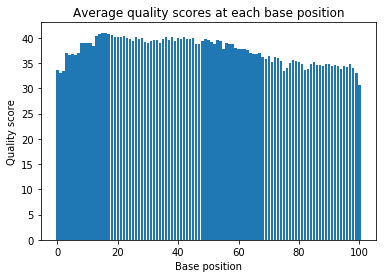

In [21]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

plt.bar(range(seqlen), mean_scores)
plt.title('Average quality scores at each base position')
plt.xlabel('Base position')
plt.ylabel('Quality score')
#plt.show()
plt.savefig(out+".qscore.distribution.png")
#Plots means of each position

In [ ]:
Number of indexes with "N"
zcat 1294_S1_L008_R2_001.fastq.gz| sed -n '2~4p'| grep "N" | wc -l
3976613

zcat 1294_S1_L008_R3_001.fastq.gz| sed -n '2~4p'| grep "N" | wc -l
3328051


In [ ]:
Quality score cutoff: average of 30 across indexes and reads, 99.9% certainty for each base